In [1]:
from src.EfficientCategoricalModel import EfficientCategoricalModel
from src.models.Base import model as imported_model
from src.optimizers.Adam import optimizer as imported_optimizer

2025-04-10 18:49:26,581 WARNING absl: At this time, the v2.11+ optimizer `tf.keras.optimizers.SGD` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.SGD`.
2025-04-10 18:49:26,639 WARNING absl: At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


In [2]:
try:
    print("Initializing efficient categorical model training...")

    data_path = "data/train.parquet"
    val_path = "data/validation.parquet"
    meta_path = "data/features.json"
    meta_model = "data/meta_model.parquet"
    # Initialize model with smaller batch size
    efficient_model = EfficientCategoricalModel(
        data_path_train = data_path, 
        data_path_val = val_path,
        data_path_metadata = meta_path,
        data_path_meta_model = meta_model,
        batch_size=64,  # Small power-of-2 batch size for memory alignment
        model=imported_model,
        optimizer=imported_optimizer
        )
        
        # Train with fewer epochs
    model, history = efficient_model.train(epochs=5)

    print("Training complete!")
        
except Exception as e:
    print(f"Error occurred: {str(e)}")
    import traceback
    traceback.print_exc()

    


Initializing efficient categorical model training...
feature_sets 17
targets 37
small 42
medium 705
all 2376
Dataset has 2,746,270 rows
Found 42 feature columns and 1 target columns
Creating dataset pipeline...
Using provided external model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 42)                0         
                                                                 
 dense (Dense)               (None, 128)               5504      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (

27832/27832 [==============================] - 11s 378us/step


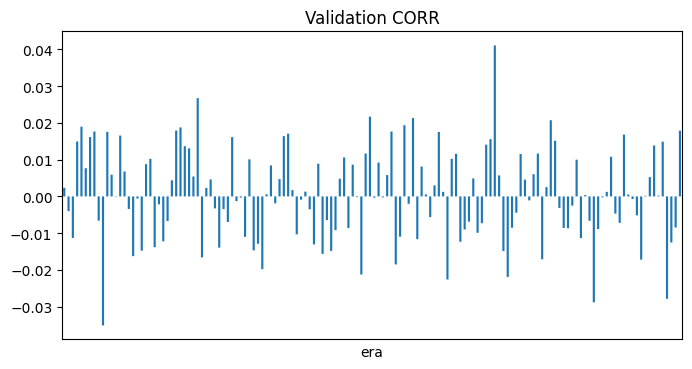

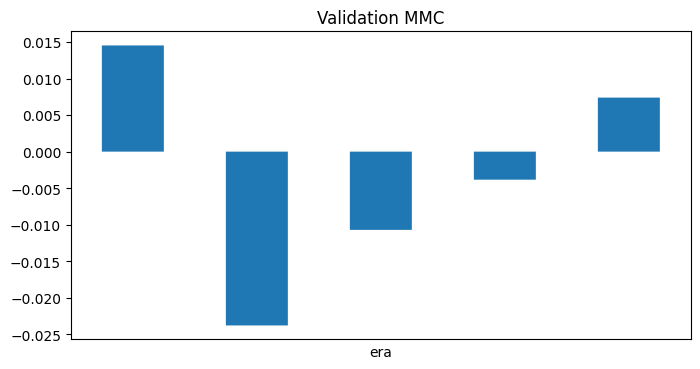

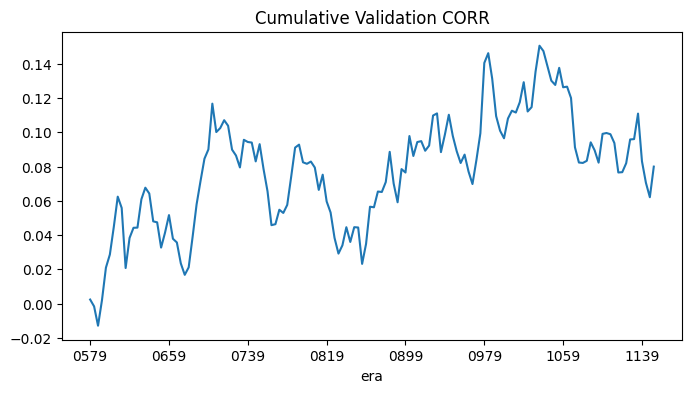

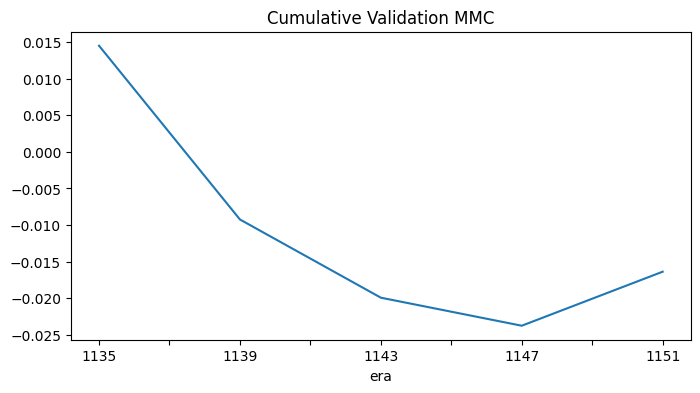

In [3]:
validate = efficient_model.validate_model()
validate[["era", "prediction", "target"]]
efficient_model.performance_eval()